In [13]:
import seaborn as sns
import pandas as pd
sns.set_theme()

review = pd.read_excel("yelp_reviews.xlsx")
review.head()
business = pd.read_excel("yelp_business.xlsx")
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


                                                categories  \
40       Pubs, Restaurants, Italian, Bars, American (Tr...   
41       Pubs, Restaurants, Italian, Bars, American (Tr...   
42       Pubs, Restaurants, Italian, Bars, American (Tr...   
43       Pubs, Restaurants, Italian, Bars, American (Tr...   
44       Pubs, Restaurants, Italian, Bars, American (Tr...   
...                                                    ...   
4268306  Restaurants, Grocery, Cafes, Food, Thai, Asian...   
4268307  Restaurants, Grocery, Cafes, Food, Thai, Asian...   
4268308  Restaurants, Grocery, Cafes, Food, Thai, Asian...   
4268309  Restaurants, Grocery, Cafes, Food, Thai, Asian...   
4268310  Restaurants, Grocery, Cafes, Food, Thai, Asian...   

                                                attributes  stars_x  cuisine  
40       {'Caters': 'True', 'Alcohol': "u'full_bar'", '...      3.0  Italian  
41       {'Caters': 'True', 'Alcohol': "u'full_bar'", '...      3.0  Italian  
42       {'Caters'

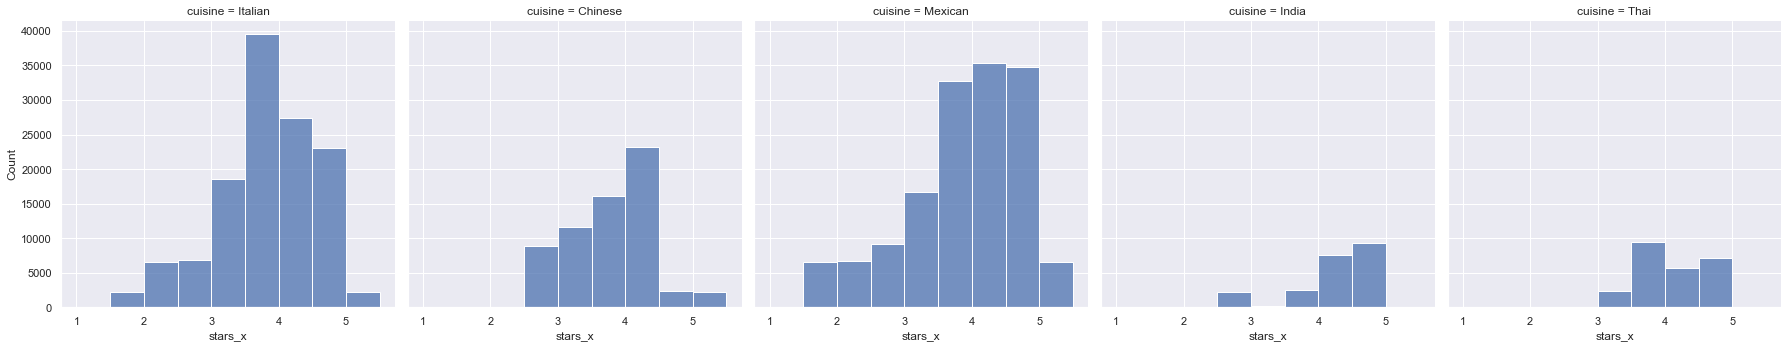

In [46]:
merged = business.merge(review, left_on='business_id', right_on='business_id')
merged = merged[merged['categories'].str.contains("Food|Restaurants", na = False)]
data = pd.DataFrame()
data = merged[['categories', 'attributes','stars_x']].copy()
data['cuisine'] = ''
data.loc[data['categories'].str.contains("Indian", na = False), 'cuisine'] = 'India'
data.loc[data['categories'].str.contains("Mexican", na = False), 'cuisine'] = 'Mexican'
data.loc[data['categories'].str.contains("Chinese", na = False), 'cuisine'] = 'Chinese'
data.loc[data['categories'].str.contains("Italian", na = False), 'cuisine'] = 'Italian'
data.loc[data['categories'].str.contains("Thai", na = False), 'cuisine'] = 'Thai'
data = data[data['cuisine'] != '']
sns.displot(data, x='stars_x', col='cuisine', bins = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5])
print(data)

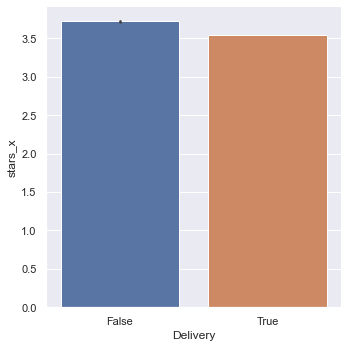

In [ ]:
data['Delivery'] = ''
data.loc[data['attributes'].str.contains('\'RestaurantsDelivery\'\: \'False\'', na = True), 'Delivery'] = False
data.loc[data['attributes'].str.contains('\'RestaurantsDelivery\'\: \'True\'', na = True), 'Delivery'] = True
delivery = data[data['Delivery'] != '']
sns.catplot(data=delivery, x="Delivery", y="stars_x", kind = 'bar')
data['NoiseLevel'] = ''
data.loc[data['attributes'].str.contains('\'NoiseLevel\'\: \"u\'quiet\'\"', na = True), 'NoiseLevel'] = 'quiet'
data.loc[data['attributes'].str.contains('\'NoiseLevel\'\: \"u\'average\'\"', na = True), 'NoiseLevel'] = 'average'
data.loc[data['attributes'].str.contains('\'NoiseLevel\'\: \"u\'loud\'\"', na = True), 'NoiseLevel'] = 'loud'
data.loc[data['attributes'].str.contains('\'NoiseLevel\'\: \"u\'very_loud\'\"', na = True), 'NoiseLevel'] = 'very_loud'
noiselevel = data[data['NoiseLevel'] != '']

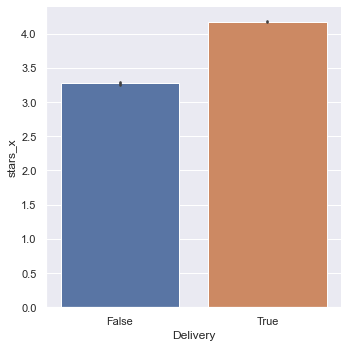

In [80]:
sns.catplot(data=delivery[delivery['cuisine'] == 'India'], x="Delivery", y="stars_x", kind = 'bar')

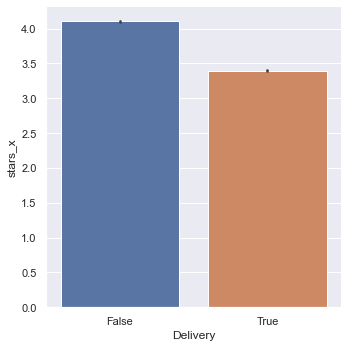

In [82]:
sns.catplot(data=delivery[delivery['cuisine'] == 'Mexican'], x="Delivery", y="stars_x", kind = 'bar')

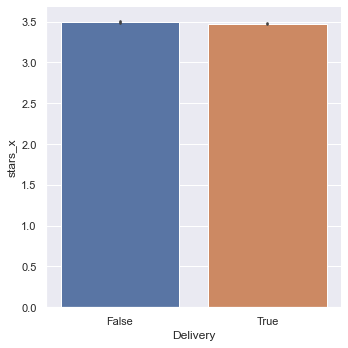

In [86]:
sns.catplot(data=delivery[delivery['cuisine'] == 'Chinese'], x="Delivery", y="stars_x", kind = 'bar')

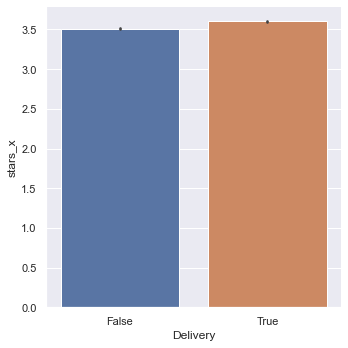

In [84]:
sns.catplot(data=delivery[delivery['cuisine'] == 'Italian'], x="Delivery", y="stars_x", kind = 'bar')

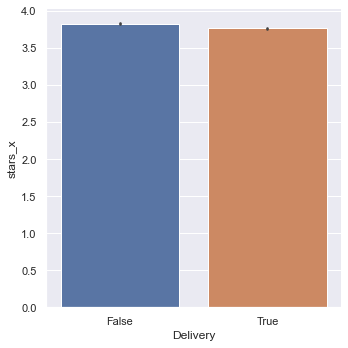

In [81]:
sns.catplot(data=delivery[delivery['cuisine'] == 'Thai'], x="Delivery", y="stars_x", kind = 'bar')

<AxesSubplot:xlabel='NoiseLevel', ylabel='stars_x'>

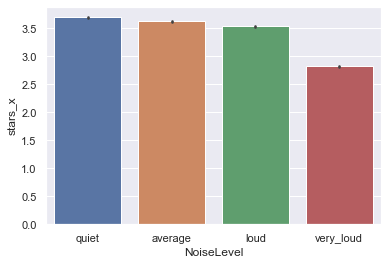

In [77]:
sns.barplot(x=noiselevel['NoiseLevel'], y=noiselevel['stars_x'], order=['quiet', 'average', 'loud', 'very_loud'])

<AxesSubplot:xlabel='NoiseLevel', ylabel='stars_x'>

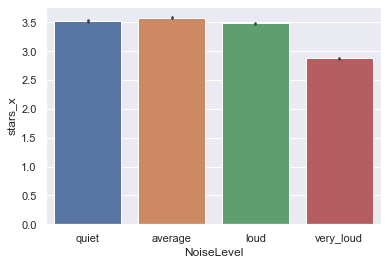

In [67]:
sns.barplot(x=noiselevel[noiselevel['cuisine'] == 'Mexican']['NoiseLevel'], y=noiselevel[noiselevel['cuisine'] == 'Mexican']['stars_x'], order=['quiet', 'average', 'loud', 'very_loud'])

<AxesSubplot:xlabel='NoiseLevel', ylabel='stars_x'>

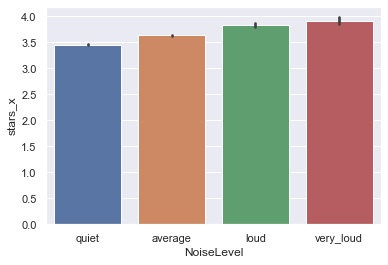

In [68]:
sns.barplot(x=noiselevel[noiselevel['cuisine'] == 'Italian']['NoiseLevel'], y=noiselevel[noiselevel['cuisine'] == 'Italian']['stars_x'], order=['quiet', 'average', 'loud', 'very_loud'])

<AxesSubplot:xlabel='NoiseLevel', ylabel='stars_x'>

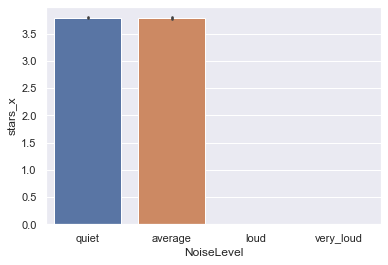

In [69]:
sns.barplot(x=noiselevel[noiselevel['cuisine'] == 'Thai']['NoiseLevel'], y=noiselevel[noiselevel['cuisine'] == 'Thai']['stars_x'], order=['quiet', 'average', 'loud', 'very_loud'])

<AxesSubplot:xlabel='NoiseLevel', ylabel='stars_x'>

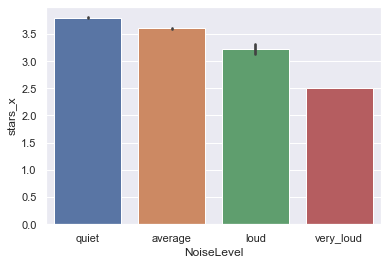

In [70]:
sns.barplot(x=noiselevel[noiselevel['cuisine'] == 'Chinese']['NoiseLevel'], y=noiselevel[noiselevel['cuisine'] == 'Chinese']['stars_x'], order=['quiet', 'average', 'loud', 'very_loud'])

<AxesSubplot:xlabel='NoiseLevel', ylabel='stars_x'>

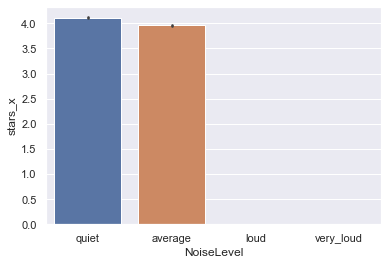

In [72]:
sns.barplot(x=noiselevel[noiselevel['cuisine'] == 'India']['NoiseLevel'], y=noiselevel[noiselevel['cuisine'] == 'India']['stars_x'], order=['quiet', 'average', 'loud', 'very_loud'])